In [10]:
#Task 1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# loading of dataset
iris = load_iris()

# creation of dataframe
irisDataframe = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# splitting of dataset into features
X = irisDataframe[['petal length (cm)', 'petal width (cm)']].values

y = iris.target
print(irisDataframe.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


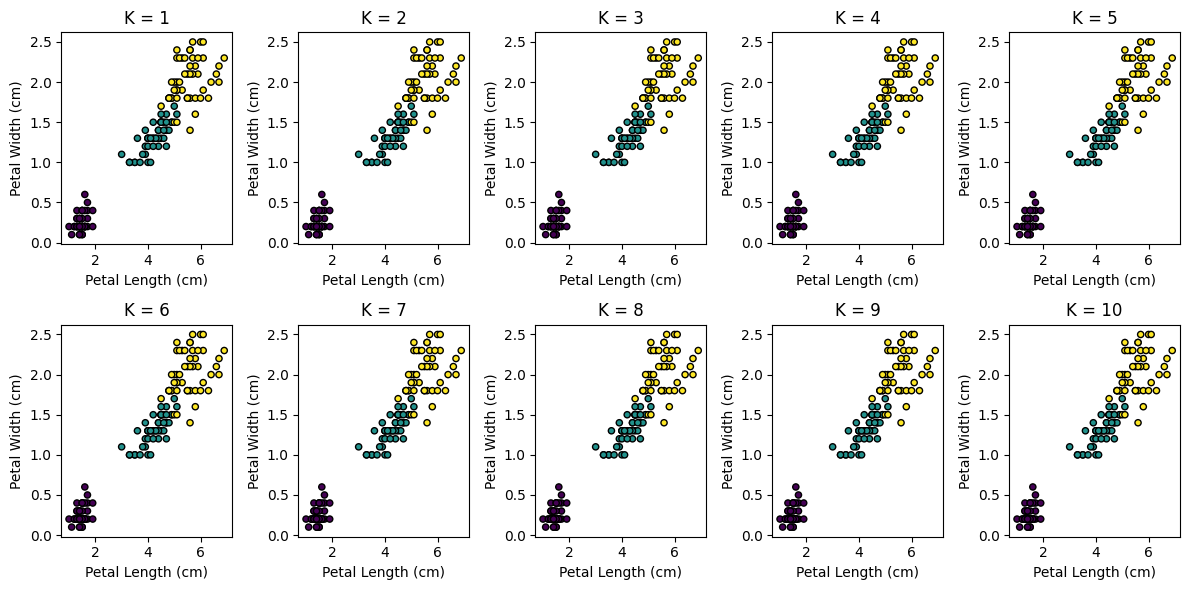

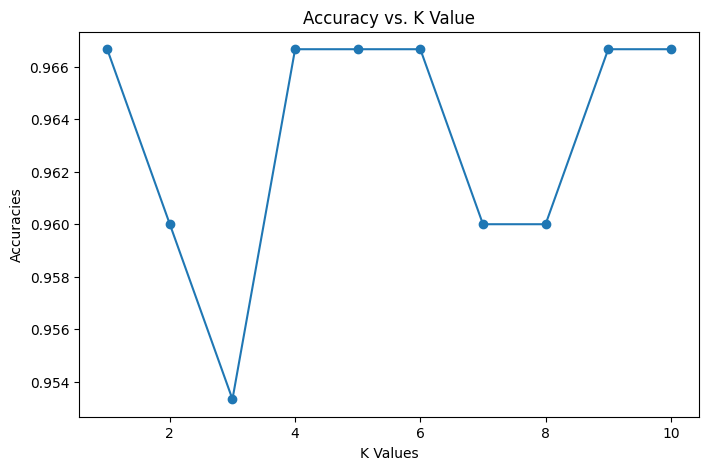

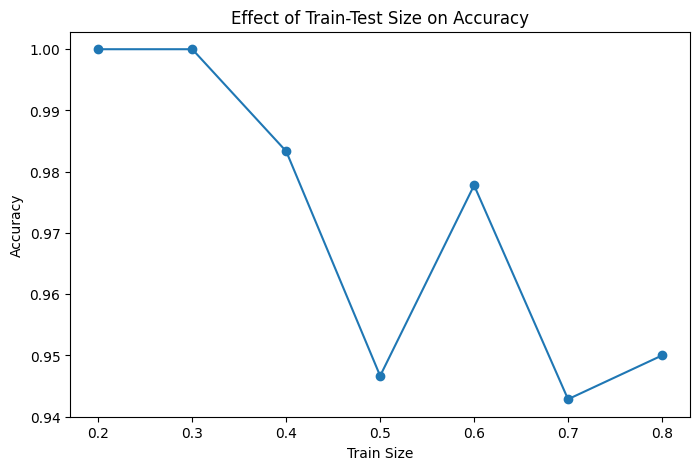

In [11]:
#Task 2
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Initialize KNeighborsClassifier with an arbitrary k (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# List of k values to test
k_values = list(range(1, 11))

# List to store accuracies for each k
accuracies = []

# List to store accuracy for different train-test sizes
accuracy_train_sizes = []

# Define train-test sizes to test
train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Create a scatter plot for different k values
plt.figure(figsize=(12, 6))

for i, k in enumerate(k_values):
    knn.n_neighbors = k
    knn.fit(X, y)
    plt.subplot(2, 5, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.title(f'K = {k}')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()

# Calculate and plot accuracy vs. K value
for k in k_values:
    knn.n_neighbors = k
    scores = cross_val_score(knn, X, y, cv=5)
    accuracies.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Values')
plt.ylabel('Accuracies')
plt.show()

# Calculate and plot effect of train-test size on accuracy
for size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_train_sizes.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, accuracy_train_sizes, marker='o')
plt.title('Effect of Train-Test Size on Accuracy')
plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.show()





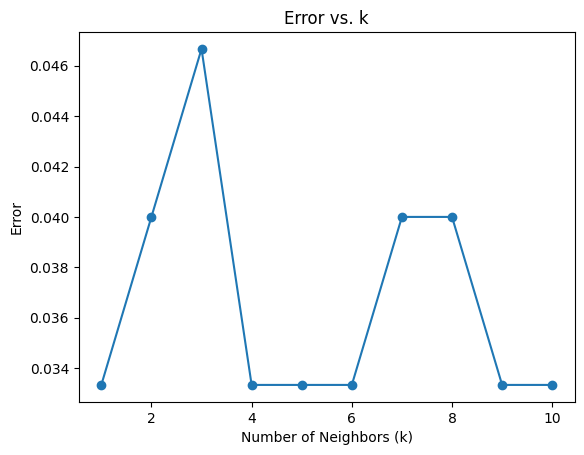

The optimal value of k is 4


In [12]:
#Task 3
# plotting error against different values of k
plt.plot(range(1, 11), Error, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('Error vs. k')
plt.show()

# implementing of elbow method
optimalValue = np.argmin(Error) + 1

# printing optimal value of k
print(f'The optimal value of k is {optimalValue}')